# Etapa 2 - Análise dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sqlite3 import connect
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
conn = connect("Passei_Direto_DB.sqlite")
cursor = conn.cursor()

cursor = cursor.execute("SELECT * FROM base_de_dados")
df = pd.DataFrame(data=cursor.fetchall(),
                  columns=["IdStudent", "RegisteredDate", "UniversityId", "CourseId", "SignupSource",
                           "PaymentDate", "PlanType", "NameCourse", "NameUniversity", "Subscriber",
                          "Logins", "Follows"])
df

,IdStudent,RegisteredDate,UniversityId,CourseId,SignupSource,PaymentDate,PlanType,NameCourse,NameUniversity,Subscriber,Logins,Follows
0,0cade9bf00234e3789afc76250e4042bc1b70784ae7004...,2012-09-06 17:27:11.370000,664704,1199555,Facebook,None,None,Engenharia Elétrica,UERJ,Not,6,5.0
1,8a501cab6c0a5a7e98a86f51a6264d81cdb562f4e99106...,2012-09-05 15:31:08.090000,664704,1199521,Facebook,None,None,Economia / Ciências Econômicas,UERJ,Not,1,5.0
2,b8a39150d98d746853087a4107e9290976cb6c99d16a29...,2012-08-17 10:00:04.270000,661625,1199517,Facebook,None,None,Direito,PUC-RIO,Not,4,5.0
3,0f6c90f966a70b84b70ea84a62d2e46ae4a2a237670815...,2012-10-22 21:16:52.157000,664768,1199491,Facebook,None,None,Ciências Ambientais,UNIRIO,Not,6,7.0
4,388bf84cffb3219384cd7a92153cf00f3b1416e4ff1473...,2012-10-24 01:48:53.700000,663106,1199573,Facebook,None,None,Engenharia Química,UFSJ,Not,2,5.0
5,5764c7b7c75f304749a9fa76e2cc811eb9c48535c495af...,2012-11-07 17:23:27.570000,664138,1199521,Facebook,None,None,Economia / Ciências Econômicas,UFSC,Not,2,5.0
6,4522694e98b51ba30fec3eb8842c795b9d93ad6bf8a991...,2012-08-21 15:13:03.080000,664742,1199517,Facebook,None,None,Direito,UFRJ,Not,1,9.0
7,0360730b79c8ecd04d08d5352f18d549e849ce90bde52f...,2012-11-22 23:51:57.090000,663609,1199553,Facebook,None,None,Engenharia de Produção,PUC-PR,Not,2,5.0
8,668514e190e792018e95c352e37a55040f00b2b716115a...,2012-10-22 21:16:52.157000,664768,1199491,Email,None,None,Ciências Ambientais,UNIRIO,Not,3,5.0
9,7c743c3365d9b969694b4c915841ccb2a207f40a82ee70...,2012-10-24 16:28:36.750000,663054,1199536,Facebook,None,None,Engenharia Ambiental,UFOP,Not,8,7.0


## Top 5 cursos

In [3]:
# Filtrando colunas desejadas

top_courses = df[[column for column in df.columns if column in ["IdStudent", "NameCourse"]]]
top_courses.head()

,IdStudent,NameCourse
0,0cade9bf00234e3789afc76250e4042bc1b70784ae7004...,Engenharia Elétrica
1,8a501cab6c0a5a7e98a86f51a6264d81cdb562f4e99106...,Economia / Ciências Econômicas
2,b8a39150d98d746853087a4107e9290976cb6c99d16a29...,Direito
3,0f6c90f966a70b84b70ea84a62d2e46ae4a2a237670815...,Ciências Ambientais
4,388bf84cffb3219384cd7a92153cf00f3b1416e4ff1473...,Engenharia Química


In [4]:
# Agrupando por curso

top_courses = top_courses.groupby(["NameCourse"], as_index=False).count()
top_courses.head()

,NameCourse,IdStudent
0,Administração,4168
1,Administração Hospitalar / Gestão Hospitalar,54
2,Administração Internacional,36
3,Administração Pública,169
4,Agricultura / Ciências Agrícolas,6


In [5]:
# Renomeando colunas

top_courses = top_courses.rename(columns={"IdStudent": "Qnt"})
top_courses.head()

,NameCourse,Qnt
0,Administração,4168
1,Administração Hospitalar / Gestão Hospitalar,54
2,Administração Internacional,36
3,Administração Pública,169
4,Agricultura / Ciências Agrícolas,6


In [6]:
# Ordenando e filtrando os Top5 cursos

top_courses = top_courses.sort_values(by="Qnt", ascending=False)[:5]
top_courses

,NameCourse,Qnt
101,Direito,9916
0,Administração,4168
139,Engenharia Civil,3562
85,Contabilidade / Ciências Contábeis,2714
364,Pedagogia,2566


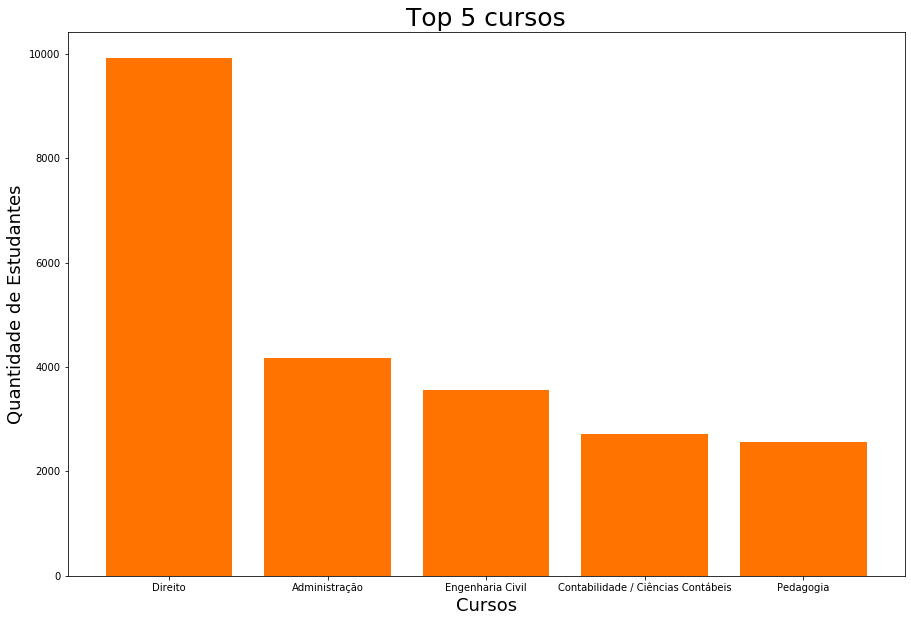

In [7]:
# Plot

plt.figure(figsize=(15, 10))
plt.bar(top_courses["NameCourse"], top_courses["Qnt"], color="#ff7300")
plt.xlabel("Cursos", fontsize=18)
plt.ylabel("Quantidade de Estudantes", fontsize=18)
plt.title("Top 5 cursos", fontsize=25)
plt.show()

## Top 3 Universidades

In [8]:
# Filtrando colunas desejadas

top_universities = df[[column for column in df.columns if column in ["IdStudent", "NameUniversity", "Subscriber"]]]
top_universities.head()

,IdStudent,NameUniversity,Subscriber
0,0cade9bf00234e3789afc76250e4042bc1b70784ae7004...,UERJ,Not
1,8a501cab6c0a5a7e98a86f51a6264d81cdb562f4e99106...,UERJ,Not
2,b8a39150d98d746853087a4107e9290976cb6c99d16a29...,PUC-RIO,Not
3,0f6c90f966a70b84b70ea84a62d2e46ae4a2a237670815...,UNIRIO,Not
4,388bf84cffb3219384cd7a92153cf00f3b1416e4ff1473...,UFSJ,Not


In [9]:
# Filtrando alunos premium

top_universities = top_universities[top_universities["Subscriber"] == "Yes"]
top_universities.head()

,IdStudent,NameUniversity,Subscriber
11,29037b0a52c5b576d32ac5842fd5b7e5991c5bef93150f...,ESTÁCIO EAD,Yes
126,b2bace77d15c3dfaf57bf9916f0e9924d12f89bdc0624c...,CEFET/MG,Yes
312,f423d6fe2f8964db634c7806e03b0f6567e992e994f06f...,ESTÁCIO,Yes
317,55ccbe518d2edbbd527eddca1431c7f7f3a4676bdbee38...,ESTÁCIO,Yes
318,b1b0f63fe3e4820cb082531af7c8911cd380e5ec8fe822...,ESTÁCIO,Yes


In [10]:
# Agrupando por Universidade

top_universities = top_universities.groupby(["NameUniversity"], as_index=False).count()
top_universities.head()

,NameUniversity,IdStudent,Subscriber
0,ANHANGUERA,2,2
1,Anhanguera,6,6
2,CDL,1,1
3,CEFET/MG,2,2
4,CEFET/RJ,2,2


In [11]:
# Renomeando colunas

top_universities = top_universities.rename(columns={"IdStudent": "Qnt"})
top_universities.head()

,NameUniversity,Qnt,Subscriber
0,ANHANGUERA,2,2
1,Anhanguera,6,6
2,CDL,1,1
3,CEFET/MG,2,2
4,CEFET/RJ,2,2


In [12]:
# Ordenando e filtrando os Top5 cursos

top_universities = top_universities.sort_values(by="Qnt", ascending=False)[:3]
top_universities

,NameUniversity,Qnt,Subscriber
9,ESTÁCIO,359,359
10,ESTÁCIO EAD,85,85
118,UNINTER,72,72


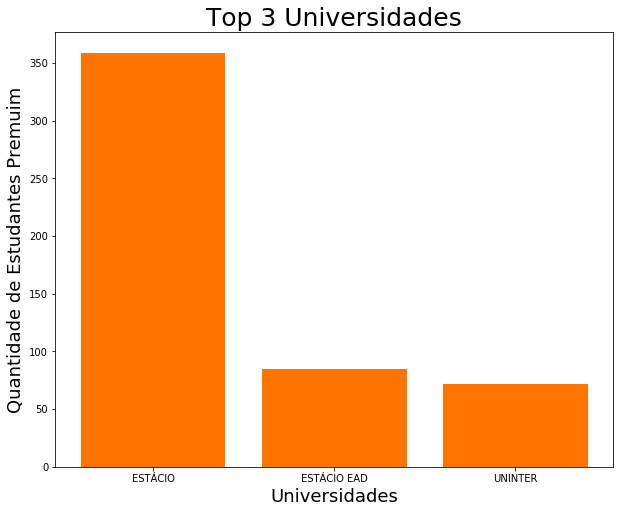

In [13]:
# Plot

plt.figure(figsize=(10, 8))
plt.bar(top_universities["NameUniversity"], top_universities["Qnt"], color="#ff7300")
plt.xlabel("Universidades", fontsize=18)
plt.ylabel("Quantidade de Estudantes Premuim", fontsize=18)
plt.title("Top 3 Universidades", fontsize=25)
t3 = plt.show()

## Tentando prever se o estudante é Premuim ou não

### Limpando dados

In [14]:
df.head()

,IdStudent,RegisteredDate,UniversityId,CourseId,SignupSource,PaymentDate,PlanType,NameCourse,NameUniversity,Subscriber,Logins,Follows
0,0cade9bf00234e3789afc76250e4042bc1b70784ae7004...,2012-09-06 17:27:11.370000,664704,1199555,Facebook,None,None,Engenharia Elétrica,UERJ,Not,6,5.0
1,8a501cab6c0a5a7e98a86f51a6264d81cdb562f4e99106...,2012-09-05 15:31:08.090000,664704,1199521,Facebook,None,None,Economia / Ciências Econômicas,UERJ,Not,1,5.0
2,b8a39150d98d746853087a4107e9290976cb6c99d16a29...,2012-08-17 10:00:04.270000,661625,1199517,Facebook,None,None,Direito,PUC-RIO,Not,4,5.0
3,0f6c90f966a70b84b70ea84a62d2e46ae4a2a237670815...,2012-10-22 21:16:52.157000,664768,1199491,Facebook,None,None,Ciências Ambientais,UNIRIO,Not,6,7.0
4,388bf84cffb3219384cd7a92153cf00f3b1416e4ff1473...,2012-10-24 01:48:53.700000,663106,1199573,Facebook,None,None,Engenharia Química,UFSJ,Not,2,5.0


In [15]:
# Removendo colunas

df_class = df[[column for column in df.columns if column not in ["IdStudent", "RegisteredDate", "SignupSource",
                                                                 "PaymentDate", "PlanType", "NameCourse", "NameUniversity"]]]
df_class.head()

,UniversityId,CourseId,Subscriber,Logins,Follows
0,664704,1199555,Not,6,5.0
1,664704,1199521,Not,1,5.0
2,661625,1199517,Not,4,5.0
3,664768,1199491,Not,6,7.0
4,663106,1199573,Not,2,5.0


In [16]:
# Removendo linhas com valores missing

df_class = df_class.dropna(axis="index")

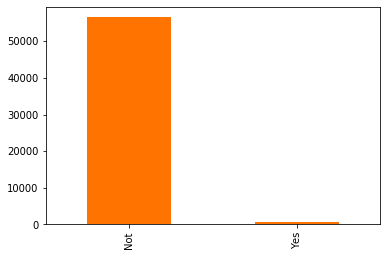

In [17]:
# Entendendo a proporção dos dados

subs = df_class["Subscriber"].value_counts()
subs.plot(kind='bar', color="#ff7300")

## Data Munging

Como os dados estão desbalanceados, será usada a técnica de balanceamento por Undersampling.

Yes    772
Not    772
Name: Subscriber, dtype: int64


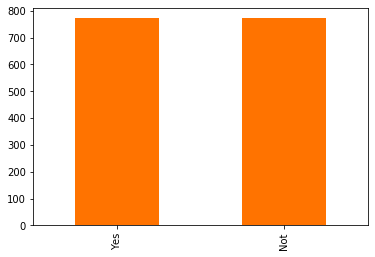

In [18]:
# Contando classes
count_class_not, count_class_yes = df_class.Subscriber.value_counts()

# Divide por Subscriber
df_class_not = df_class[df_class['Subscriber'] == "Not"]
df_class_yes = df_class[df_class['Subscriber'] == "Yes"]
df_class_not_under = df_class_not.sample(count_class_yes, replace=True)
df_over = pd.concat([df_class_not_under, df_class_yes], axis=0)

print(df_over.Subscriber.value_counts())
df_over.Subscriber.value_counts().plot(kind='bar', color="#ff7300")

### Dividindo os dados em treino e teste

In [19]:
x = df_over[[column for column in df_over.columns if column not in ["Subscriber"]]]
y = df_over["Subscriber"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Árvore de Decisão

In [20]:
tree = DecisionTreeClassifier()

model_tree = tree.fit(x_train, y_train)

predict = model_tree.score(x_test, y_test)

predict

0.7758620689655172

### Naive Bayes

In [21]:
nb = GaussianNB()

model_nb = nb.fit(x_train, y_train)

predict = model_nb.score(x_test, y_test)

predict

0.5280172413793104

### Regressão Logística

In [22]:
lr = LogisticRegression()

model_lr = lr.fit(x_train, y_train)

predict = model_lr.score(x_test, y_test)

predict

C:\Users\Joao_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4870689655172414

## Considerações Finais

Com o objetivo de auxiliar o time de marketing do PD, desenvolveu-se um modelo de Machine Learning com 77% de precisão (Modelo Árvore de Decisão) para prever se um dado usuário deveria ser ou não do tipo Premium. O objetivo desse modelo é detectar os usuários que através de uma ação de marketing terão maior tendência de se tornarem Premuim.

Além disso, segue abaixo um print screen do Dashboard feito no MS PowerBi

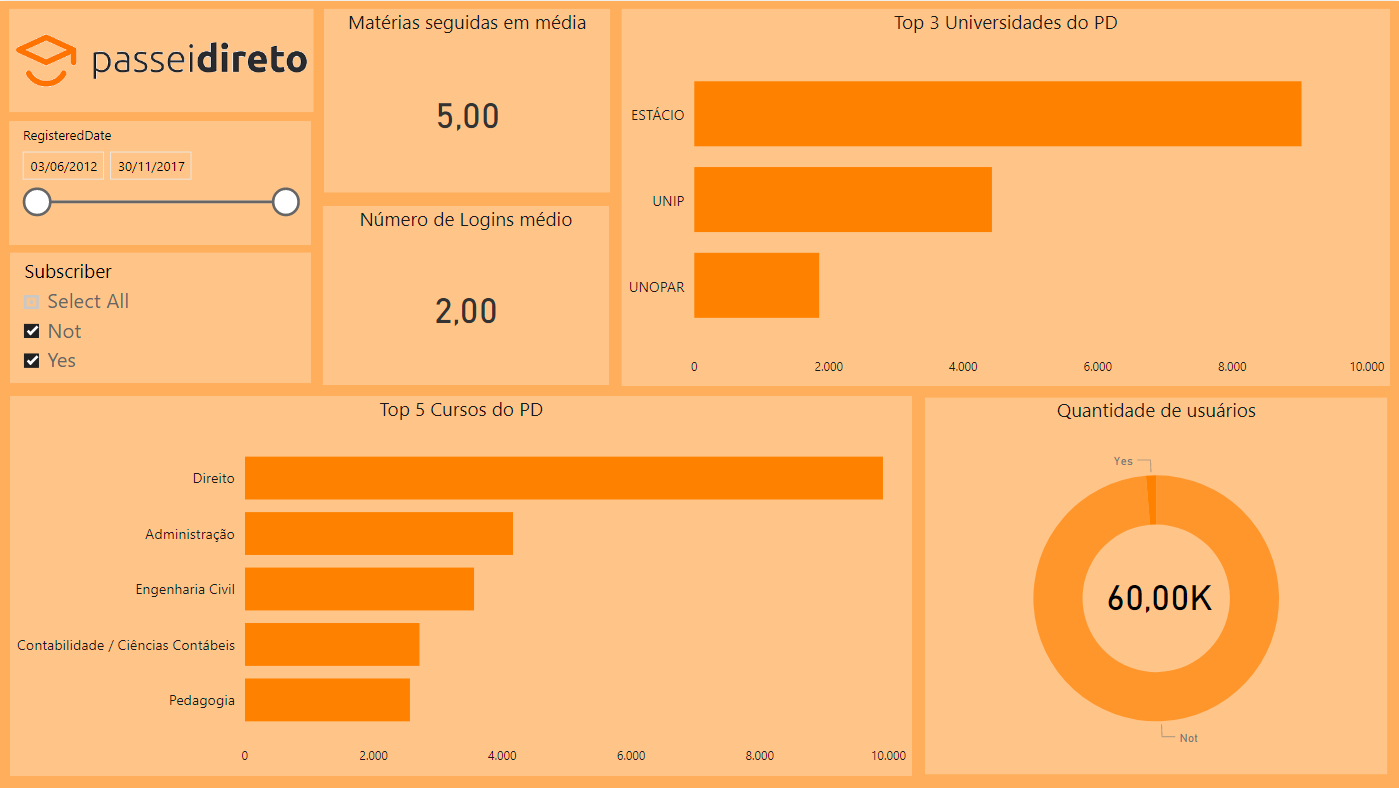

In [24]:
from IPython.display import Image
Image(r"C:\Users\Joao_\Desktop\PD_bi.png")